<a href="https://colab.research.google.com/github/Orixstranger/AgendaBD/blob/master/Calles_accidentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
!pip install plotly
import numpy as np #Operaciones matemáticas rápidas sobre matrices
import pandas as pd #biblioteca de análisis y manipulación de datos para Python
import plotly.express as px
import matplotlib.pyplot as plt #Proporciona una forma de trazado similar a MATLAB. pyplot está diseñado principalmente para gráficos interactivos y casos simples de generación de tramas programáticas. La API orientada a objetos se recomienda para gráficos más complejos.
import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
import statsmodels.api as sm

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')


df= pd.read_csv('AT2019_NBD.csv')
#df= pd.read_csv('NBD-csv.csv')
#df1= pd.read_csv('AT2020_NBD.csv')
#df2= pd.read_csv('AT2021_NBD.csv')
#df3= pd.read_csv('AT2018_NBD.csv')
#df=df.append(df1)
#df=df.append(df2)
#df=df.append(df3)
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,fecha,dia,hora,latitud,longitud,tipologia,direccion,zona,parroquia_urbana,causas,nro_heridos,nro_fallecidos
0,01-01,martes,h04,-4.002271,-79.212242,estrellamiento,de los paltas y caran shiri,urbana,sucre,conducir en estado de embriaguez,0,0
1,01-01,martes,h06,-4.024814,-79.203255,estrellamiento,pio jaramillo alvarado entre benjamin franklin...,urbana,punzara,imprudencia del conductor,0,0
2,01-01,martes,h06,-3.975969,-79.227888,roce positivo,isidro ayora barrio plateado,urbana,sucre,imprudencia del conductor,2,0
3,01-01,martes,h02,-3.960426,-79.216096,choque lateral angular,8 de diciembre y belisario moreno,urbana,carigan,imprudencia del conductor,0,0
4,01-01,martes,h03,-4.000044,-79.234883,estrellamiento,integracion barrial - angel felicisimo rojas,urbana,punzara,conducir en estado de embriaguez,0,0


In [107]:
fig = px.density_mapbox(df,lat='latitud', lon='longitud',radius=3,center=dict(lat=-3.99313,lon=-79.20422),zoom=10.5,mapbox_style="open-street-map")

fig.show()

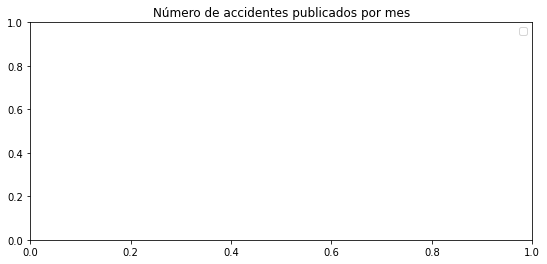

In [108]:
fig, ax = plt.subplots(figsize=(9,4))

for zona in df.zona.unique():
    df_temp = df[df['zona'] == zona].copy()
    df_temp['fecha'] = pd.to_datetime(df_temp['fecha'],errors='coerce')
    df_temp['fecha'] = df_temp['fecha'].dt.strftime('%m-%d')
    df_temp = df_temp.groupby(df_temp['fecha']).size()
    #df_temp.plot(label="fecha", ax=ax)

ax.set_title('Número de accidentes publicados por mes')
ax.legend();

In [109]:
#df['ano'] = df['ano'].replace({'-':''}, regex=True).astype(float)
#df['hora'] = df['hora'].replace({':':''}, regex=True).astype(float)
#df['hora'] = df['hora'].replace({':':''}, regex=True).astype(float)
#df.Discount.replace('',np.nan)
#df['ano'] = pd.to_datetime(df['ano'],format='%Y%m%d')
#df['hora'] = pd.to_datetime(df['hora'],format='%H:%M')
df.isnull().sum()

fecha               0
dia                 0
hora                0
latitud             0
longitud            0
tipologia           0
direccion           0
zona                0
parroquia_urbana    0
causas              0
nro_heridos         0
nro_fallecidos      0
dtype: int64

In [110]:
df=df.loc[:,df.columns!="fecha"]
#df=df.loc[:,df.columns!="hora"]
df=df.loc[:,df.columns!="latitud"]
df=df.loc[:,df.columns!="longitud"]
df=df.loc[:,df.columns!="direccion"]
df=df.loc[:,df.columns!="gravedad"]
df=df.loc[:,df.columns!="vehiculos_retenidos"]
df=df.loc[:,df.columns!="senalizacion_existente"]
df=df.loc[:,df.columns!="condicion_calzada"]
df=df.loc[:,df.columns!="condicion_atmosferica"]

In [111]:
df.isnull().sum()

dia                 0
hora                0
tipologia           0
zona                0
parroquia_urbana    0
causas              0
nro_heridos         0
nro_fallecidos      0
dtype: int64

In [112]:
df.sample(10)

,dia,hora,tipologia,zona,parroquia_urbana,causas,nro_heridos,nro_fallecidos
422,domingo,h14,choque lateral angular,urbana,punzara,no ceder el derecho de via,1,0
193,lunes,h09,choque por alcance,urbana,carigan,conducir en estado de embriaguez,0,0
66,martes,h21,choque lateral perpendicular,urbana,san sebastian,no ceder el derecho de via,3,0
373,jueves,h22,perdida de carril,urbana,sucre,conducir en exceso de velocidad,0,0
31,sabado,h21,choque por alcance,urbana,el sagrario,conducir en estado de embriaguez,1,0
171,lunes,h08,choque lateral perpendicular,urbana,el sagrario,cambio brusco e indebido de carril,0,0
461,domingo,h06,choque lateral angular,urbana,el sagrario,no respetar las senales de transito,0,0
92,viernes,h21,choque lateral perpendicular,urbana,el sagrario,conducir en estado de embriaguez,2,0
462,domingo,h02,choque lateral perpendicular,urbana,sucre,conducir en estado de embriaguez,1,0
316,sabado,h02,choque frontal excentrico,urbana,carigan,conducir en estado de embriaguez,3,0


In [113]:
#print(df['direccion'].unique())# datos en texto

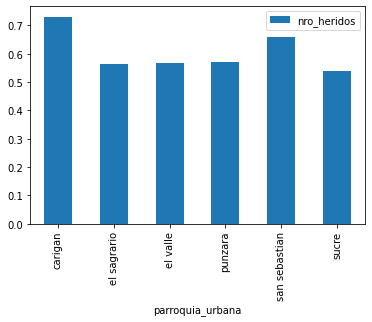

In [114]:
df[['parroquia_urbana','nro_heridos']].groupby(['parroquia_urbana']).mean().plot.bar()
plt.show()

In [115]:
ds=pd.DataFrame(df)
#Presenta el numero de filas
print("El numero de filas(observaciones) es: ",ds.shape[0])

#Presenta el numero de columnas
print("El numero de columnas(variables) es: ",len(ds.columns))

El numero de filas(observaciones) es:  506
El numero de columnas(variables) es:  8


In [116]:
# tipos de la variables
ds.dtypes

dia                 object
hora                object
tipologia           object
zona                object
parroquia_urbana    object
causas              object
nro_heridos          int64
nro_fallecidos       int64
dtype: object

In [117]:
df['causas'].value_counts()

conducir en exceso de velocidad                   117
conducir en estado de embriaguez                  115
no ceder el derecho de via                         91
imprudencia del conductor                          71
no respetar las senales de transito                32
no mantener la distancia reglamentaria             32
imprudencia del peaton                             24
cambio brusco e indebido de carril                  7
invadir carril de circulacion                       5
razones desconocidas                                5
fallas mecanicas no previsibles                     3
condiciones climaticas desfavorables                1
negligencia del conductor                           1
no respetar las ordenes del agente de transito      1
impericia del conductor                             1
Name: causas, dtype: int64

In [118]:
print(df['causas'].unique())# datos en texto

['conducir en estado de embriaguez' 'imprudencia del conductor'
 'no ceder el derecho de via' 'conducir en exceso de velocidad'
 'cambio brusco e indebido de carril' 'fallas mecanicas no previsibles'
 'no respetar las senales de transito' 'invadir carril de circulacion'
 'imprudencia del peaton' 'no mantener la distancia reglamentaria'
 'razones desconocidas' 'condiciones climaticas desfavorables'
 'negligencia del conductor'
 'no respetar las ordenes del agente de transito'
 'impericia del conductor']


In [119]:
print(df['causas'].unique())# datos en texto

['conducir en estado de embriaguez' 'imprudencia del conductor'
 'no ceder el derecho de via' 'conducir en exceso de velocidad'
 'cambio brusco e indebido de carril' 'fallas mecanicas no previsibles'
 'no respetar las senales de transito' 'invadir carril de circulacion'
 'imprudencia del peaton' 'no mantener la distancia reglamentaria'
 'razones desconocidas' 'condiciones climaticas desfavorables'
 'negligencia del conductor'
 'no respetar las ordenes del agente de transito'
 'impericia del conductor']


In [120]:
df['causas']= df['causas'].apply(lambda x: 
                                    1 if x == 'imprudencia del conductor' else 
                                    2 if x == 'conducir en estado de embriaguez' else 
                                    3 if x == 'conducir en exceso de velocidad' else
                                    4 if x == 'no respetar las senales de transito' else 
                                    5 if x == 'imprudencia del peaton' else
                                    6 if x == 'no ceder el derecho de via' else
                                    7 if x == 'fallas mecanicas no previsibles' else
                                    8 if x == 'no mantener la distancia reglamentaria' else
                                    9 if x == 'condiciones climaticas desfavorables' else
                                    10 if x == 'negligencia del conductor' else
                                    11 if x == 'cruce de animales en la via' else
                                    12 if x == 'impericia del conductor' else
                                    13)


In [121]:
print(df['parroquia_urbana'].unique()) # datos convertidos a numeros enteros

['sucre' 'punzara' 'carigan' 'el sagrario' 'el valle' 'san sebastian']


In [122]:
df['parroquia_urbana']= df['parroquia_urbana'].apply(lambda x: 
                                    1 if x == 'el sagrario' else 
                                    2 if x == 'san sebastian' else 
                                    3 if x == 'el valle' else
                                    4 if x == 'sucre' else 
                                    5 if x == 'punzara' else
                                    6 if x == 'carigan' else
                                    7)

In [123]:
print(df['parroquia_urbana'].unique()) # datos convertidos a numeros enteros

[4 5 6 1 3 2]


In [124]:
df['zona']= df['zona'].apply(lambda x: 
                                    1 if x == 'urbana' else 
                                    2)

In [125]:
print(df['zona'].unique()) # datos convertidos a numeros enteros

[1]


In [126]:
print(df['tipologia'].unique()) # datos convertidos a numeros enteros

['estrellamiento' 'roce positivo' 'choque lateral angular'
 'choque lateral perpendicular' 'choque frontal excentrico' 'atropello'
 'perdida de carril' 'colision' 'atipico' 'choque por alcance'
 'encunetamiento' 'arrollamiento' 'roce negativo' 'caida de pasajero'
 'rozamiento' 'choque frontal longitudinal' 'volcamiento lateral'
 'volcamiento longitudinal']


In [127]:
df['tipologia']= df['tipologia'].apply(lambda x: 
                                    1 if x == 'arrollamiento' else 
                                    2 if x == 'atipico' else 
                                    3 if x == 'atropello' else
                                    4 if x == 'caida de pasajero' else 
                                    5 if x == 'choque frontal' else
                                    6 if x == 'choque frontal excentrico' else
                                    7 if x == 'choque frontal longitudinal' else
                                    8 if x == 'choque lateral angular' else
                                    9 if x == 'choque lateral perpendicular' else
                                    10 if x == 'choque por alcance' else
                                    11 if x == 'colision' else
                                    12 if x == 'encunetamiento' else
                                    13 if x == 'estrellamiento' else
                                    14 if x == 'perdida de carril' else
                                    15 if x == 'perdida de pista' else
                                    16 if x == 'roce negativo' else
                                    17 if x == 'roce positivo' else
                                    18 if x == 'rozamiento' else
                                    19 if x == 'volcamiento' else
                                    20 if x == 'volcamiento lateral' else
                                    21)

In [128]:
print(df['tipologia'].unique()) # datos convertidos a numeros enteros

[13 17  8  9  6  3 14 11  2 10 12  1 16  4 18  7 20 21]


In [129]:
df['dia']= df['dia'].apply(lambda x: 
                                    1 if x == 'lunes' else 
                                    2 if x == 'martes' else 
                                    3 if x == 'miercoles' else
                                    4 if x == 'jueves' else 
                                    5 if x == 'viernes' else
                                    6 if x == 'sabado' else
                                    7 )

In [130]:
print(df['dia'].unique()) # datos convertidos a numeros enteros

[2 3 4 6 7 1 5]


In [131]:
df['hora']= df['hora'].apply(lambda x: 
                                    0 if x == 'h00' else
                                    1 if x == 'h01' else 
                                    2 if x == 'h02' else 
                                    3 if x == 'h03' else
                                    4 if x == 'h04' else 
                                    5 if x == 'h05' else
                                    6 if x == 'h06' else
                                    7 if x == 'h07' else
                                    8 if x == 'h08' else
                                    9 if x == 'h09' else
                                    10 if x == 'h10' else
                                    11 if x == 'h11' else
                                    12 if x == 'h12' else
                                    13 if x == 'h13' else
                                    14 if x == 'h14' else
                                    15 if x == 'h15' else
                                    16 if x == 'h16' else
                                    17 if x == 'h17' else
                                    18 if x == 'h18' else
                                    19 if x == 'h19' else
                                    20 if x == 'h20' else
                                    21 if x == 'h21' else
                                    22 if x == 'h22' else
                                    23)

In [132]:
df= df[df['parroquia_urbana'] <= 6]
df= df[df['zona'] <= 1]

In [133]:
# datos aleatorios (muestra de 10 elementos)
ds.sample(10)

,dia,hora,tipologia,zona,parroquia_urbana,causas,nro_heridos,nro_fallecidos
264,6,0,13,1,4,2,0,0
190,7,2,9,1,1,3,0,0
219,7,8,8,1,1,6,0,0
473,6,2,3,1,1,3,1,0
226,2,23,10,1,2,8,3,0
234,5,11,13,1,2,1,2,0
86,2,8,8,1,4,4,1,0
348,1,12,10,1,1,8,0,0
43,5,12,3,1,4,5,1,0
215,5,14,9,1,4,6,1,0


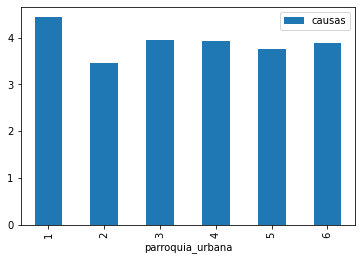

In [134]:
df[['parroquia_urbana','causas']].groupby(['parroquia_urbana']).mean().plot.bar()
plt.show()

In [135]:
y = df[['tipologia']] # atributos de destino
X = df.iloc[:, 0:16] # atributos de entrada seran las primeras 13 columnas
                    
X.sample(10) #presentacion de los atriutos de entrada

,dia,hora,tipologia,zona,parroquia_urbana,causas,nro_heridos,nro_fallecidos
164,3,4,13,1,3,2,2,0
194,1,15,3,1,4,5,1,0
416,4,0,14,1,5,3,0,1
155,1,14,3,1,2,5,1,0
484,1,20,8,1,6,4,0,0
259,7,5,13,1,3,2,1,0
204,6,15,13,1,2,3,0,0
200,5,6,13,1,3,3,0,0
73,4,15,13,1,2,1,0,0
0,2,4,13,1,4,2,0,0


In [136]:
y.head() # presentacion del atributo de destino

,tipologia
0,13
1,13
2,17
3,8
4,13


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# stratify=y
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 354 datos para entrenamiento y 152 datos para prueba


In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

classifier = DecisionTreeClassifier(criterion = 'entropy')

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)







In [139]:
# Resumen de las predicciones hechas por el clasificador
print(classification_report(y_test, y_pred))
matriz=confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00        12
           6       0.86      1.00      0.92         6
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00        38
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         4
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        17
          16       1.00      1.00      1.00         3
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1

    accuracy                           0.97       152
   macro avg       0.69      0.70      0.68       152
weighted avg       0.97   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

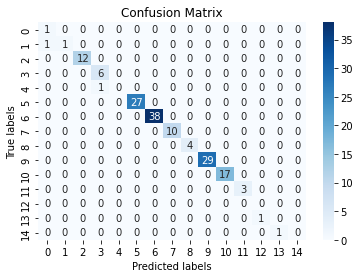

In [140]:
#Matriz de confusion
ax= plt.subplot()
sns.heatmap(matriz, annot=True, cmap="Blues",fmt='g');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [141]:
# Precisión
from sklearn.metrics import accuracy_score
print('Precision árboles de decisión: ',accuracy_score(y_pred,y_test))

Precision árboles de decisión:  0.9736842105263158


In [142]:
ds.groupby('tipologia').size()

tipologia
1       2
2       8
3      45
4       2
6      17
7       3
8      96
9     106
10     36
11     10
12      1
13    109
14     54
16     12
17      1
18      2
20      1
21      1
dtype: int64

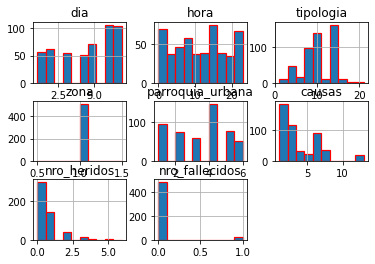

In [143]:
ds.hist(edgecolor='red', linewidth=1.2)

from pandas.plotting import scatter_matrix
# Matriz de diagramas de dispersión
#scatter_matrix(ds,figsize=(15,15))
#plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'causas')

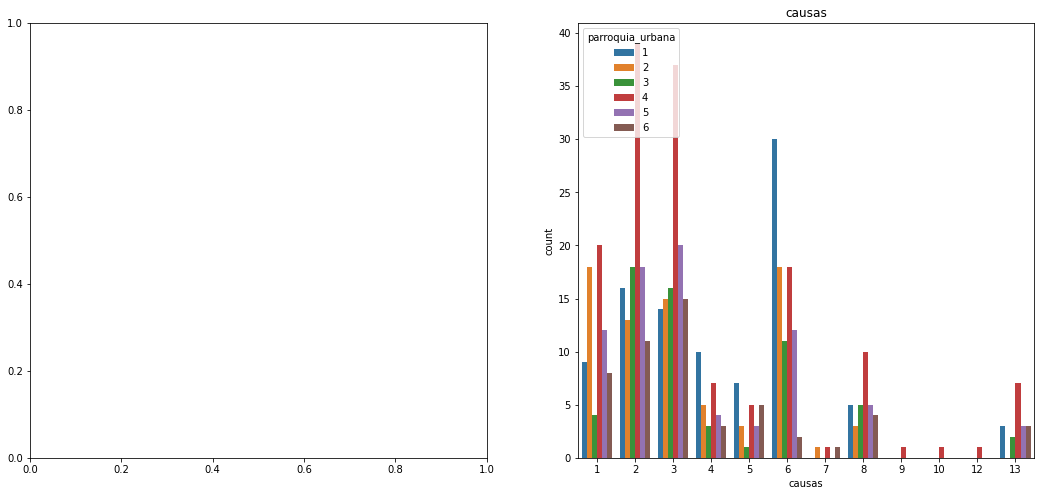

In [144]:
import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
f, ax = plt.subplots(1,2,figsize = (18,8))

sns.countplot('causas', hue = 'parroquia_urbana', data = df, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('causas')